# Libraries

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from numpy.linalg import inv
from scipy.optimize import minimize
from functools import partial
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import random
# from joblib import Parallel, delayed
import multiprocessing
import itertools
from multiprocessing import Pool
import pandas as pd
import math

# Orthogonality

## Data Files

In [2]:
# Normal order file
data1 = pd.read_csv("Normal order 48 degree.CSV")

In [3]:
# Reverse order file
data2 = pd.read_csv("Reverse order 48 degree.CSV")

In [4]:
# The first column record the rundom number, with "1","2","3","4","5" correspond to 
# the Normal measurement Order: "M1->M2", "M2-> M3", "M3-> M4", "M4-> M5", "M5-> M1",respectively;  
# and "6","7","8","9","10" 
# correspond to Reverse Order: "M1->M5", "M2->M1", "M3->M2", "M4->M3",  "M5->M4", respectively.

data1.columns = ["meas", "Op1", "Op2"]
data2.columns = ["meas", "Op1", "Op2"]

In [5]:
data1.head()

,meas,Op1,Op2
0,1,17,0
1,1,15,0
2,1,0,44
3,3,0,45
4,1,13,0


In [6]:
data2.head()

,meas,Op1,Op2
0,9,0,0
1,8,12,0
2,8,0,43
3,7,18,1
4,7,0,0


## Relabelling

In [7]:
# The second column record the photon counts of the first measurement, 
# which correspond to "Dark state" if the value <2.5; and "Bright state" the other case.

data1.loc[data1["Op1"] <2.5,"Op1"] = 0 
data1.loc[data1["Op1"] >=2.5,"Op1"] =1
data2.loc[data2["Op1"] <2.5,"Op1"] = 0 
data2.loc[data2["Op1"] >=2.5,"Op1"] =1

In [8]:
# The third column record the photon counts of the second measurement, 
# which correspond to "Dark state" if the value <8.5; and "Bright state" the other case.

data1.loc[data1["Op2"] <8.5,"Op2"] = 0 
data1.loc[data1["Op2"] >=8.5,"Op2"] =1
data2.loc[data2["Op2"] <8.5,"Op2"] = 0 
data2.loc[data2["Op2"] >=8.5,"Op2"] =1

In [9]:
data1.head()

,meas,Op1,Op2
0,1,1,0
1,1,1,0
2,1,0,1
3,3,0,1
4,1,1,0


In [10]:
data2.head()

,meas,Op1,Op2
0,9,0,0
1,8,1,0
2,8,0,1
3,7,1,0
4,7,0,0


In [11]:
data1["Product"] = data1["Op1"]*data1["Op2"]
data2["Product"] = data2["Op1"]*data2["Op2"]

In [12]:
data1

,meas,Op1,Op2,Product
0,1,1,0,0
1,1,1,0,0
2,1,0,1,0
3,3,0,1,0
4,1,1,0,0
...,...,...,...,...
83268,4,1,0,0
83269,2,1,0,0
83270,3,0,1,0
83271,3,0,1,0


In [13]:
data2

,meas,Op1,Op2,Product
0,9,0,0,0
1,8,1,0,0
2,8,0,1,0
3,7,1,0,0
4,7,0,0,0
...,...,...,...,...
52760,9,0,1,0
52761,10,1,0,0
52762,9,0,1,0
52763,9,1,0,0


In [14]:
data3 = data1.append(data2)

In [15]:
data3

,meas,Op1,Op2,Product
0,1,1,0,0
1,1,1,0,0
2,1,0,1,0
3,3,0,1,0
4,1,1,0,0
...,...,...,...,...
52760,9,0,1,0
52761,10,1,0,0
52762,9,0,1,0
52763,9,1,0,0


In [16]:
data3.sum()

meas       671385
Op1         61258
Op2         61146
Product       848
dtype: int64

In [17]:
# Coarse-grained deviation from orthogonality
848/136038.0

0.006233552389773446

## Fine-Grained Orthogonality

In [18]:
# |P(11|pia,pib) -P(11|pib,pia)| <= max(P(11|pia,pib),P(11|pia,pib))
# Finding the worst case deviation from orthogonality, thus, corresponds to finding the max over all
# probabilities.
Or1 = data1.loc[data1["meas"]==1]
Or2 = data1.loc[data1["meas"]==2]
Or3 = data1.loc[data1["meas"]==3]
Or4 = data1.loc[data1["meas"]==4]
Or5 = data1.loc[data1["meas"]==5]

In [19]:
Or6 = data2.loc[data2["meas"]==6]
Or7 = data2.loc[data2["meas"]==7]
Or8 = data2.loc[data2["meas"]==8]
Or9 = data2.loc[data2["meas"]==9]
Or10 = data2.loc[data2["meas"]==10]
Or10.head()

,meas,Op1,Op2,Product
10,10,1,0,0
11,10,0,0,0
12,10,1,0,0
16,10,0,1,0
22,10,0,1,0


In [20]:
Or4.shape

(16668, 4)

In [21]:
List1= []
List1.append(Or1.sum()["Product"]/Or1.shape[0])
List1.append(Or2.sum()["Product"]/Or2.shape[0])
List1.append(Or3.sum()["Product"]/Or3.shape[0])
List1.append(Or4.sum()["Product"]/Or4.shape[0])
List1.append(Or5.sum()["Product"]/Or5.shape[0])
List1.append(Or6.sum()["Product"]/Or6.shape[0])
List1.append(Or7.sum()["Product"]/Or7.shape[0])
List1.append(Or8.sum()["Product"]/Or8.shape[0])
List1.append(Or9.sum()["Product"]/Or9.shape[0])
List1.append(Or10.sum()["Product"]/Or10.shape[0])
List1

[0.005516668643967256,
 0.007807338898564651,
 0.004268879268879269,
 0.004019678425725942,
 0.0033406219630709427,
 0.005245588936576061,
 0.007589412769186984,
 0.011034612845421107,
 0.007966616084977238,
 0.00906344410876133]

In [22]:
max(List1)

0.011034612845421107

# Repeatability

##  Data Files

In [23]:
# Sharpness measurement i
SM1 = pd.read_csv("SharpnessM1.csv")
SM2 = pd.read_csv("SharpnessM2.csv")
SM3 = pd.read_csv("SharpnessM3.csv")
SM4 = pd.read_csv("SharpnessM4.csv")
SM5 = pd.read_csv("SharpnessM5.csv")

In [24]:
SM1.columns = ["Op1", "Op2"]
SM2.columns = ["Op1", "Op2"]
SM3.columns = ["Op1", "Op2"]
SM4.columns = ["Op1", "Op2"]
SM5.columns = ["Op1", "Op2"]

## Processing

### $\Pi_1$

In [25]:
SM1.loc[SM1["Op1"] <2.5,"Op1"] = 0 
SM1.loc[SM1["Op2"] <8.5,"Op2"] = 0 
SM1.loc[SM1["Op1"] >=2.5,"Op1"] = 1 
SM1.loc[SM1["Op2"] >=8.5,"Op2"] = 1 

In [26]:
SM1["XOR"] = (SM1["Op1"]+SM1["Op2"])%2

In [27]:
SM1.shape[0]

14999

In [28]:
SM1.sum()["XOR"]

96.0

In [29]:
1-(96.0/14999)

0.993599573304887

In [30]:
96.0/14999

0.006400426695113008

### $\Pi_2$

In [31]:
SM2.loc[SM2["Op1"] <2.5,"Op1"] = 0 
SM2.loc[SM2["Op2"] <8.5,"Op2"] = 0 
SM2.loc[SM2["Op1"] >=2.5,"Op1"] = 1 
SM2.loc[SM2["Op2"] >=8.5,"Op2"] = 1 
SM2["XOR"] = (SM2["Op1"]+SM2["Op2"])%2
Tot2 = SM2.shape[0]
1-(SM2.sum()["XOR"]/Tot2)

0.9913327555170345

In [32]:
(SM2.sum()["XOR"]/Tot2)

0.008667244482965531

In [33]:
SM3.loc[SM3["Op1"] <2.5,"Op1"] = 0 
SM3.loc[SM3["Op2"] <8.5,"Op2"] = 0 
SM3.loc[SM3["Op1"] >=2.5,"Op1"] = 1 
SM3.loc[SM3["Op2"] >=8.5,"Op2"] = 1 
SM3["XOR"] = (SM3["Op1"]+SM3["Op2"])%2
Tot3 = SM3.shape[0]
1-(SM3.sum()["XOR"]/Tot3)

0.9899326621774786

In [34]:
(SM3.sum()["XOR"]/Tot3)

0.010067337822521501

In [35]:
SM4.loc[SM4["Op1"] <2.5,"Op1"] = 0 
SM4.loc[SM4["Op2"] <8.5,"Op2"] = 0 
SM4.loc[SM4["Op1"] >=2.5,"Op1"] = 1 
SM4.loc[SM4["Op2"] >=8.5,"Op2"] = 1 
SM4["XOR"] = (SM4["Op1"]+SM4["Op2"])%2
Tot4 = SM4.shape[0]
1-(SM4.sum()["XOR"]/Tot4)

0.9934662310820721

In [36]:
(SM4.sum()["XOR"]/Tot4)

0.006533768917927862

In [37]:
SM5.loc[SM5["Op1"] <2.5,"Op1"] = 0 
SM5.loc[SM5["Op2"] <8.5,"Op2"] = 0 
SM5.loc[SM5["Op1"] >=2.5,"Op1"] = 1 
SM5.loc[SM5["Op2"] >=8.5,"Op2"] = 1 
SM5["XOR"] = (SM5["Op1"]+SM5["Op2"])%2
Tot5 = SM5.shape[0]
1-(SM5.sum()["XOR"]/Tot5)

0.994066271084739

In [38]:
(SM5.sum()["XOR"]/Tot5)

0.005933728915261017

# Final Error

In [39]:
delta = 0.010
epsilon = max(List1)
epsilon

0.011034612845421107

In [40]:
err = 2*epsilon + delta + epsilon*epsilon

In [41]:
err

0.03219098837149055

In [42]:
fiderr = 32.22*epsilon

In [43]:
fiderr

0.35553522587946806

## Noisy Fidelity

In [44]:
Fidata = pd.read_csv("Robustness_1.csv")

In [45]:
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0

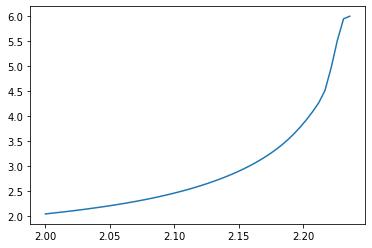

In [46]:
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"])

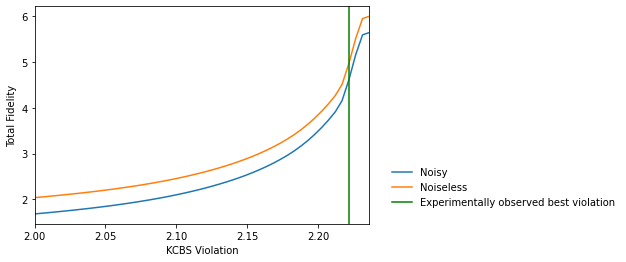

In [47]:
fig = plt.figure()
#plt.plot(Fidata["KCBS Value"]+err,Fidata["Total Fidelity"]-fiderr,label='Noisy')
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"]-fiderr,label='Noisy')
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Noiseless')
plt.axvline((5+3.886)/4,color = 'green',label='Experimentally observed best violation')
plt.xlim(2,np.sqrt(5))
plt.xlabel('KCBS Violation')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.3),shadow=False, ncol=1,frameon=False)
plt.savefig('Five_cycle_Noisy.pdf', bbox_inches='tight')

## Experimental Datapoints

In [48]:
def ComptoExc(val):
    return (5-val)/4

In [49]:
ComptoExc(-3.8)

2.2

In [50]:
data_viol = [-3.886,-3.854,-3.639,-3.407]
data_x = []
for k in data_viol:
    data_x.append(ComptoExc(k))
data_x

[2.2215, 2.2135, 2.15975, 2.10175]

In [51]:
meas_fid_48 = 0.994 + 0.991 + 0.996 + 0.995 + 0.990
meas_fid_48

4.966

In [52]:
state_fid = [0.999,0.999,0.935,0.846]

In [53]:
Total_fid = []
for k in state_fid:
    Total_fid.append(k+meas_fid_48)
Total_fid 

[5.965, 5.965, 5.901, 5.812]

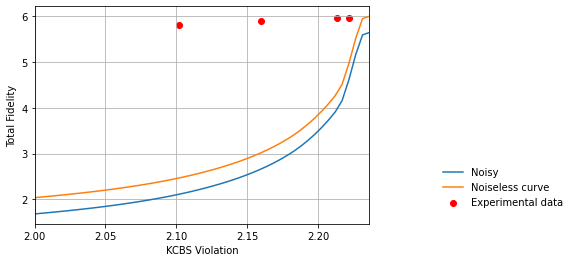

In [54]:
fig = plt.figure()
#plt.plot(Fidata["KCBS Value"]+err,Fidata["Total Fidelity"]-fiderr,label='Noisy curve')
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"]-fiderr,label='Noisy')
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Noiseless curve')
plt.scatter(data_x,Total_fid,color = 'red',label='Experimental data')
# plt.axvline((5+3.886)/4,color = 'green',label='Experimentally observed best violation')
plt.xlim(2,np.sqrt(5))
plt.grid(True)
plt.xlabel('KCBS Violation')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.3),shadow=False, ncol=1,frameon=False)
plt.savefig('Five_cycle_Noisy_exp.pdf', bbox_inches='tight')

# Data File

In [55]:
col1 = pd.Series(Fidata["KCBS Value"]).array
col2 = pd.Series(Fidata["Total Fidelity"]).array
col3 = pd.Series(Fidata["Total Fidelity"]-fiderr).array

In [56]:
findata = pd.DataFrame([col1,col2,col3])
findata = findata.T
findata.columns = ["KCBS Value", "Noiseless Fidelity", "Noisy Fidelity"]

In [57]:
findata;

In [58]:
findata.to_csv("robustness_curves.csv")